## **1.0 BUSINESS CASE**


# **1.1 Introduction**
**Optimizing Claims Management for Financial Stability in Insurance.**

Over the years, insurance companies have faced financial risk due to fraudulent claims, inefficencies and inconsistent assessments of policyholders. Many insurance companies has filled for bankruptcy over the years as revealed by Insurance times, notable mentions are: Lamp, Alpha, Enterprise, Gable, Independent. The major set back of these insurance companies has been solvency issues due to huge payout claims and being unable to meet their financial goals. To mitigate these risks, insurance companies must leverage data analytics to gain deeper insights into customer behaviour, claim ratios, and policy performance.

Autoinsurance claims has been on the rise according to data released by forbes, there is 13% increase in the final quarter of 2024. This puts many autoinsurance company at risk but financial managagement by understanding their customers based on claims history, vehicle type, claim ratio, customers profile, premium  can help mitigate finacial risk. By analysing historical claims data and policyholder profiles, insurers can develop strategies to optimize claims management and improve.



# **1.2 Business Goals**

The goal of this business case is to generate insights that can be beneficial to the insurance company. This insights will enable the company plan and manage their customer portfolio better towards the next fiscal year. Analysis will be focused on but not limited to:

Determine the claim ratio of individual customers.

Analysing the claim ratio of different vehicle types.

Average claims per year.

Exploring the relationship between premium, claims frequency and area.

By achieving these objectives, the insurance comapany can enhance its risk assessments models, optimize premium pricing and implement better fraud detection mechanisms, ultimately reducing financial risk and ensuring long-term solvency.



# **1.3 Data Selection**

The data picked for this business case is a business insurance datasets from https://data.mendeley.com/datasets/5cxyb5fp4f/2. This data contains  different observations of policy holders of an insurance company from a period of 4 years between 2015 till 2018. The datasets contains various observations that aligns with our business case to understand customers based on claim history, premium paid, location, claim ratio and vehicle attributes. The dataset is well suited for this business case as it allows us to:

Identify claim patterns and trends over multiple years.
Analyze the relationship between vehicle characteristics and claim frequency.
Access policyholder risk profiles based on claims history.
Explore location based claims.
# **1.4 Data Exploration**

# These are the important observations and information relating to the business case:

ID: Internal identification number assigned to each annual contract formalized by an insured. Each policyholder can have multiple rows in the dataset, representing different annuities of the product.

date_start_contract: Start date of the policyholder's contract (DD/MM/YYYY).

date_last_renewal: Date of last contract renewal (DD/MM/YYYY).

date_next_renewal: Date of the next contract renewal (DD/MM/YYYY).

Distribution_channel:Classifies the channel through which the policy was contracted. 0 for Agent and 1 for Insurance brokers.

Premium: Net premium amount associated with the policy during the current year.

Cost_claims_year: Total cost of claims incurred for the insurance policy during the current year.

N_claim_year: total number of claims filled by the insurance for the particular current year.

N_claim_history:Total number of claims filed throughout the entire duration of the insurance policy.

Type_risk: Type of risk associated with the policy. Each value corresponds to a specific risk type: 1 for motorbikes, 2 for vans, 3 for passenger cars and 4 for agricultural vehicles.

Area: Dichotomous variable indicates the area. 0 for rural and 1 for urban (more than 30,000 inhabitants) in terms of traffic conditions i.e. the location of the policyholder.

Power: vehicle power measured in horsepower.

Value_vehicle: amount the vehicle was bought.

Type_fuel: Dichotomous variable indicates the area. 0 for rural and 1 for urban (more than 30,000 inhabitants) in terms of traffic conditions.






# With the sample file which is the second datasets.

ID: Internal identification number assigned to each annual contract formalized by an insured. Each policyholder can have multiple rows in the dataset, representing different annuities of the product.

cost_claims_by_type: Total cost of claims by type for the insurance policy during the current year.

claim_type: the type of claim the customer lodged e.g. travel insurance, broken, windows, theft e.t.c.


# **2.0 DATA PREPARATION**




# 2.1 Data Importation

In [ ]:
#Importing the motor insurance datasets.
import numpy as np
import pandas as pd
mot_ins = pd.read_csv('https://www.dropbox.com/scl/fi/ixutcygmak122jumy14ax/Motor-vehicle-insurance-data.csv?rlkey=wunhqkmym3qm7jxibn4egi6ua&st=59ly4nef&raw=1', sep=';')
mot_ins.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


In [ ]:
#This shows the number of observations in our datasets.
mot_ins.shape

(105555, 30)

Upon loading the data, we have 105555 rows and 30 columns. This columns contains the previously described observations.


In [ ]:
#This describes our data types.
mot_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  int64  
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

Observing the datatypes, enables us to determine if the datatypes  are correctly represented and if columns contains missing values based on the null value count. In this case, the date columns are object type instead of timestamp. The remaining observations are duly represented in their respective datatypes.  

In [ ]:
#In insurance it is important to see how much is being paid by policyholders
mot_ins[['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Premium']].head(20)

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Premium
0,1,05/11/2015,05/11/2015,05/11/2016,222.52
1,1,05/11/2015,05/11/2016,05/11/2017,213.78
2,1,05/11/2015,05/11/2017,05/11/2018,214.84
3,1,05/11/2015,05/11/2018,05/11/2019,216.99
4,2,26/09/2017,26/09/2017,26/09/2018,213.70
5,2,26/09/2017,26/09/2018,26/09/2019,215.83
6,3,29/11/2013,29/11/2015,29/11/2016,380.20
7,3,29/11/2013,29/11/2016,29/11/2017,393.50
8,3,29/11/2013,29/11/2017,29/11/2018,393.50
9,3,29/11/2013,29/11/2018,29/11/2019,395.47


The policyholders ID contains duplicates because of the date contracts that expires annually and the amount paid for renewal each year. To reduce the duplicates, it is important to melt the data to get one unique ID, fix the date contracts of each policyholder and sum of the premium.




# 2.2 Data Preparation Techniques.

The following data preparation techniques were adopted.


1.   Data melting using aggregation function to remove duplicates for better manipulation and retain information of each policy holder.  
2.   Merging of the two data sets with left join to retain policy ID and important information.
3. Removing columns not relevant to the business case.
4. Converting to correct datatypes for better manipulation during visualisation.  
5. Addressing missing data.
6. Data mapping of observations relevant to the business case for proper representation.
7. Renaming the columns with better descriptive names.
8. Calculating new columns.   



**2.2.1 DATA MELTING USING AGGREGATE FUNCTION**

In [ ]:
# Performing aggregation functions to melt the data due to the duplication of the Unique ID
#This will merge duplicates e.g ID1 has renewed for 4 years, with total premium of 868.13.

agg_funcs = {
    "Date_start_contract": "min",  # Earliest contract start date
    "Date_last_renewal": "max",  # Latest renewal date
    "Date_next_renewal": "max",  # Latest next renewal
    "Date_birth": "first",
    "Date_driving_licence": "first",
    "Distribution_channel": "first",
    "Seniority": "max",
    "Policies_in_force": "max",
    "Max_policies": "max",
    "Max_products": "max",
    "Lapse": "sum",
    "Payment": "sum",
    "Premium": "sum",
    "Cost_claims_year": "sum",
    "N_claims_year": "sum",
    "N_claims_history": "sum",
    "R_Claims_history": "sum",
    "Type_risk": "first",
    "Area": "first",
    "Second_driver": "max",
    "Year_matriculation": "first",
    "Power": "first",
    "Cylinder_capacity": "first",
    "Value_vehicle": "first",
    "N_doors": "first",
    "Type_fuel": "first",
    "Length": "first",
    "Weight": "first",
}


#SOURCE: https://chatgpt.com/c/67f45b77-c268-8012-944f-1d66f068eb87

In [ ]:
#We grouped by ID and by aggregate function. This is important to sum the premium and make it unique.
mot_ins = mot_ins.groupby("ID").agg(agg_funcs).reset_index()

In [ ]:
#Saving the data into a new file based on the aggregration function
motor_ins = mot_ins.to_csv('motor_ins.csv', index=False)
motor_ins

#the index is set to be false so that the first column will not authomatically be the index

In [ ]:
#This code will read our csv and the ID will be the index
motor_ins = pd.read_csv('motor_ins.csv', index_col=0)
motor_ins.head(30)

,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
ID,,,,,,,,,,,,,,,,,,,,,
1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,1,...,0,0,2004,80,599,7068.00,0,P,NaN,190
2,26/09/2017,26/09/2018,26/09/2019,15/04/1956,20/03/1976,0,4,2,2,1,...,0,0,2004,80,599,7068.00,0,P,NaN,190
3,29/11/2013,29/11/2018,29/11/2019,18/03/1975,10/07/1995,0,15,1,2,1,...,0,0,2013,85,1229,16030.00,5,P,3.999,1105
4,21/10/2016,21/10/2018,21/10/2019,10/07/1973,05/07/1993,0,3,2,2,1,...,0,0,1986,6,74,1261.82,0,P,NaN,87
5,12/05/2017,12/05/2018,12/05/2019,10/07/1973,05/07/1993,0,3,2,2,1,...,0,0,1986,6,244,3000.00,0,P,NaN,92
6,29/05/2006,29/05/2018,29/05/2019,21/10/1966,10/09/1990,0,13,1,2,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
7,11/02/2015,11/02/2016,11/02/2017,14/05/1946,24/03/2000,1,3,1,1,1,...,0,0,2009,109,1396,16550.00,5,P,4.245,1168
8,28/05/2001,28/05/2018,28/05/2019,11/05/1941,01/08/1962,0,18,1,2,2,...,0,0,2001,130,1984,27330.00,4,P,4.547,1310
9,24/10/2013,24/10/2017,24/10/2018,22/10/1949,17/05/1995,1,6,3,3,1,...,0,1,2013,65,1870,13140.00,5,D,4.129,1125


The aggregration function has changed the shape of the data by eliminating duplicates.
It can be observed that the melt data has eliminated the duplicates, the contracts now runs from the start date to the next renewal, making the data more readable. The premium of each policyholder has also been summed.


To observe that the aggregration worked, re-run thesame code:

In [ ]:
#Re-running the same code with our newly saved data. The ID is now unique with no duplicates,
#and the date runs from start contract to next renewal.

motor_ins[['Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Premium']].head(20)

,Date_start_contract,Date_last_renewal,Date_next_renewal,Premium
ID,,,,
1,05/11/2015,05/11/2018,05/11/2019,868.13
2,26/09/2017,26/09/2018,26/09/2019,429.53
3,29/11/2013,29/11/2018,29/11/2019,1562.67
4,21/10/2016,21/10/2018,21/10/2019,353.37
5,12/05/2017,12/05/2018,12/05/2019,161.30
6,29/05/2006,29/05/2018,29/05/2019,767.88
7,11/02/2015,11/02/2016,11/02/2017,340.43
8,28/05/2001,28/05/2018,28/05/2019,1024.19
9,24/10/2013,24/10/2017,24/10/2018,473.46


**Importing the second datasets.**



In [ ]:
#importing the second datasets
claim = pd.read_csv('https://www.dropbox.com/scl/fi/rhpmd8k2slz7s1cyn4njk/sample-type-claim.csv?rlkey=g9a5b1k2vkgrbg6z2b5ixrlz5&st=ejmwzizx&raw=1', sep=';', index_col=0)
claim

,Cost_claims_year,Cost_claims_by_type,Claims_type
ID,,,
28,332.02,332.02,complaint
36,57.35,57.35,travel assistance
42,57.50,57.50,travel assistance
60,138.90,67.25,travel assistance
60,138.90,71.65,travel assistance
...,...,...,...
53413,298.87,198.97,broken windows
53419,497.47,497.47,complaint
53441,73.32,73.32,travel assistance


In [ ]:
# Checking the total number of observations and variables in the data
claim.shape

(7366, 3)

The second datasets contains 7366 rows and 3 columns. This datasets contains ID, cost claim year, cost claim by type and claim type which are important to our business case.

The ID and cost_claim_year column is a similarity shared by the first  dataset.  

The claim data will be melted following the citeria below before merging it with the motor_ins data.

1. The Cost_claims_by_type column will be dropped. Reason: The column will be dropped because the amount in the Cost_claims_by_type sums up to total amount in the Cost_claims_year for each ID.

2. Mode will be used for the aggreagtion of the column Cost_claims_year. Reason: The column has a duplicate ID with the same amount, so the mode of each duplicate ID will be picked.

3. The Mode for Claims_type will also be picked to eliminate duplicates of claim type.

In [ ]:
# dropping the column Cost_claims_by_type
claim = claim.drop('Cost_claims_by_type', axis=1)

In [ ]:
# Melting the data by unique ID using mode for Cost_claims_year and Claims_type
claim = claim.groupby('ID').agg({
    'Cost_claims_year': pd.Series.mode,
    'Claims_type': pd.Series.mode
}).reset_index()

In [ ]:
# Saving as a new datasets to display
claim.to_csv("claims.csv", index=False)

In [ ]:
claims = pd.read_csv('claims.csv', index_col=0)
claims.head(10)

,Cost_claims_year,Claims_type
ID,,
28,332.02,complaint
36,57.35,travel assistance
42,57.50,travel assistance
60,138.90,travel assistance
77,1574.93,complaint
78,257.36,complaint
95,471.66,broken windows
96,56.39,travel assistance
103,67.25,travel assistance


**2.2.2. MERGING OF THE TWO DATA**

The two data sets (motor_ins and claims) will be merge before answering the objectives of the business case.

The two datasets will be merge following this citeria below:

1. The Cost_claims_year	in the claims data will be renamed as Cost_claims_year_second for proper identification.

2. Cost_claims_year and Cost_claims_year_second will be merge into a new column called **Total_cost_claims_year** two conditions will be put into consideration;

    **Condition 1:** If an ID from the first dataset (motor_ins) does not exist in the second dataset (claims), its Cost_claims_year will still be retained.
    
    **Condition 2:** If the Cost_claims_year values for the same ID are identical in both datasets, only one of them will be kept in the Total_cost_claims_year.

3. After merging the dataset, the original Cost_claims_year and Cost_claims_year_second will be dropped.

4. The new merging data set will be saved to a new file called **motor_ins_claims**

In [ ]:
# remaing the Cost_claims_year in the claims data
claims.rename(columns={'Cost_claims_year': 'Cost_claims_year_second'}, inplace=True)

In [ ]:
# Merging the datasets on ID, using left join to retain all IDs from the first dataset.

motor_claims = pd.merge(motor_ins, claims, on='ID', how='left')

In [ ]:
# Total_cost_claims_year will be created based on the number 2 criteria listed above
motor_claims['Total_cost_claims_year'] = motor_claims.apply(lambda row: row['Cost_claims_year']
                                                                    if row['Cost_claims_year'] == row['Cost_claims_year_second']
                                                                    else row['Cost_claims_year'] if pd.notnull(row['Cost_claims_year'])
                                                                    else row['Cost_claims_year_second'], axis=1)
# Code explanation
# 1. if the value in the Cost_claims_year is equal to the value Cost_claims_year_second then it retains the value
# 2. if both are not equal, it checks if the Cost_claims_year in the first data is null, if it is not null, it retains the value of the first dataset
# 3. if the Cost_claims_year in the first data is null, it takes the value from the Cost_claims_year_second of the second dataset.

In [ ]:
# Dropping both columns (Cost_claims_year and Cost_claims_year_second)
motor_claims = motor_claims.drop(columns=['Cost_claims_year', 'Cost_claims_year_second'])

In [ ]:
motor_claims.head(10)

,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,...,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Claims_type,Total_cost_claims_year
ID,,,,,,,,,,,,,,,,,,,,,
1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,1,...,2004,80,599,7068.00,0,P,NaN,190,NaN,0.00
2,26/09/2017,26/09/2018,26/09/2019,15/04/1956,20/03/1976,0,4,2,2,1,...,2004,80,599,7068.00,0,P,NaN,190,NaN,0.00
3,29/11/2013,29/11/2018,29/11/2019,18/03/1975,10/07/1995,0,15,1,2,1,...,2013,85,1229,16030.00,5,P,3.999,1105,NaN,0.00
4,21/10/2016,21/10/2018,21/10/2019,10/07/1973,05/07/1993,0,3,2,2,1,...,1986,6,74,1261.82,0,P,NaN,87,NaN,0.00
5,12/05/2017,12/05/2018,12/05/2019,10/07/1973,05/07/1993,0,3,2,2,1,...,1986,6,244,3000.00,0,P,NaN,92,NaN,0.00
6,29/05/2006,29/05/2018,29/05/2019,21/10/1966,10/09/1990,0,13,1,2,2,...,2006,87,1598,9927.00,4,P,4.250,1055,NaN,0.00
7,11/02/2015,11/02/2016,11/02/2017,14/05/1946,24/03/2000,1,3,1,1,1,...,2009,109,1396,16550.00,5,P,4.245,1168,NaN,2162.89
8,28/05/2001,28/05/2018,28/05/2019,11/05/1941,01/08/1962,0,18,1,2,2,...,2001,130,1984,27330.00,4,P,4.547,1310,NaN,0.00
9,24/10/2013,24/10/2017,24/10/2018,22/10/1949,17/05/1995,1,6,3,3,1,...,2013,65,1870,13140.00,5,D,4.129,1125,NaN,0.00


In [ ]:
# saving the new dataset
motor_claims.to_csv('motor_ins_data.csv')

In [ ]:
motor_ins_claims = pd.read_csv('motor_ins_data.csv', index_col=0)
motor_ins_claims.head(10)

,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,...,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Claims_type,Total_cost_claims_year
ID,,,,,,,,,,,,,,,,,,,,,
1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,1,...,2004,80,599,7068.00,0,P,NaN,190,NaN,0.00
2,26/09/2017,26/09/2018,26/09/2019,15/04/1956,20/03/1976,0,4,2,2,1,...,2004,80,599,7068.00,0,P,NaN,190,NaN,0.00
3,29/11/2013,29/11/2018,29/11/2019,18/03/1975,10/07/1995,0,15,1,2,1,...,2013,85,1229,16030.00,5,P,3.999,1105,NaN,0.00
4,21/10/2016,21/10/2018,21/10/2019,10/07/1973,05/07/1993,0,3,2,2,1,...,1986,6,74,1261.82,0,P,NaN,87,NaN,0.00
5,12/05/2017,12/05/2018,12/05/2019,10/07/1973,05/07/1993,0,3,2,2,1,...,1986,6,244,3000.00,0,P,NaN,92,NaN,0.00
6,29/05/2006,29/05/2018,29/05/2019,21/10/1966,10/09/1990,0,13,1,2,2,...,2006,87,1598,9927.00,4,P,4.250,1055,NaN,0.00
7,11/02/2015,11/02/2016,11/02/2017,14/05/1946,24/03/2000,1,3,1,1,1,...,2009,109,1396,16550.00,5,P,4.245,1168,NaN,2162.89
8,28/05/2001,28/05/2018,28/05/2019,11/05/1941,01/08/1962,0,18,1,2,2,...,2001,130,1984,27330.00,4,P,4.547,1310,NaN,0.00
9,24/10/2013,24/10/2017,24/10/2018,22/10/1949,17/05/1995,1,6,3,3,1,...,2013,65,1870,13140.00,5,D,4.129,1125,NaN,0.00


In [ ]:
# Checking the shape of the data
motor_ins_claims.shape

(53502, 29)

**2.2.3. REMOVING COLUMNS**

From the dataset, it is important to trim-down our data sets by removing columns not relevant to our business case.

In [ ]:
#Removing columns not needed for our business case,
motor_ins_claims.drop(['Date_birth', 'Date_driving_licence','Seniority','Policies_in_force','Payment','R_Claims_history','Max_policies',
                'Max_products','Lapse','Second_driver','N_doors','Length','Weight','Cylinder_capacity','Year_matriculation'], axis=1, inplace=True)

In [ ]:
motor_ins_claims.head(20)

,Date_start_contract,Date_last_renewal,Date_next_renewal,Distribution_channel,Premium,N_claims_year,N_claims_history,Type_risk,Area,Power,Value_vehicle,Type_fuel,Claims_type,Total_cost_claims_year
ID,,,,,,,,,,,,,,
1,05/11/2015,05/11/2018,05/11/2019,0,868.13,0,0,1,0,80,7068.00,P,NaN,0.00
2,26/09/2017,26/09/2018,26/09/2019,0,429.53,0,0,1,0,80,7068.00,P,NaN,0.00
3,29/11/2013,29/11/2018,29/11/2019,0,1562.67,0,0,3,0,85,16030.00,P,NaN,0.00
4,21/10/2016,21/10/2018,21/10/2019,0,353.37,0,0,1,0,6,1261.82,P,NaN,0.00
5,12/05/2017,12/05/2018,12/05/2019,0,161.30,0,0,1,0,6,3000.00,P,NaN,0.00
6,29/05/2006,29/05/2018,29/05/2019,0,767.88,0,6,3,0,87,9927.00,P,NaN,0.00
7,11/02/2015,11/02/2016,11/02/2017,1,340.43,3,4,3,0,109,16550.00,P,NaN,2162.89
8,28/05/2001,28/05/2018,28/05/2019,0,1024.19,0,18,3,0,130,27330.00,P,NaN,0.00
9,24/10/2013,24/10/2017,24/10/2018,1,473.46,0,4,3,0,65,13140.00,D,NaN,0.00


**2.2.4. CONVERTING TO CORRECT DATA TYPES.**

It is important to have your data observations in the correct data type.
The right datatype gives you more options in visualisation and reduces potential risk of poor representation of visuals.

In [ ]:
#checking if our data is represented in the right datatype.
motor_ins_claims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53502 entries, 1 to 53502
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date_start_contract     53502 non-null  object 
 1   Date_last_renewal       53502 non-null  object 
 2   Date_next_renewal       53502 non-null  object 
 3   Distribution_channel    53502 non-null  int64  
 4   Premium                 53502 non-null  float64
 5   N_claims_year           53502 non-null  int64  
 6   N_claims_history        53502 non-null  int64  
 7   Type_risk               53502 non-null  int64  
 8   Area                    53502 non-null  int64  
 9   Power                   53502 non-null  int64  
 10  Value_vehicle           53502 non-null  float64
 11  Type_fuel               52645 non-null  object 
 12  Claims_type             5255 non-null   object 
 13  Total_cost_claims_year  53502 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory u

In [ ]:
#Converting date columns to date times, having the right data types enables better visualisation.
date_cols = ["Date_start_contract", "Date_last_renewal", "Date_next_renewal"]
motor_ins_claims[date_cols]= motor_ins_claims[date_cols].apply(pd.to_datetime, dayfirst=True)
motor_ins_claims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53502 entries, 1 to 53502
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date_start_contract     53502 non-null  datetime64[ns]
 1   Date_last_renewal       53502 non-null  datetime64[ns]
 2   Date_next_renewal       53502 non-null  datetime64[ns]
 3   Distribution_channel    53502 non-null  int64         
 4   Premium                 53502 non-null  float64       
 5   N_claims_year           53502 non-null  int64         
 6   N_claims_history        53502 non-null  int64         
 7   Type_risk               53502 non-null  int64         
 8   Area                    53502 non-null  int64         
 9   Power                   53502 non-null  int64         
 10  Value_vehicle           53502 non-null  float64       
 11  Type_fuel               52645 non-null  object        
 12  Claims_type             5255 non-null   object     

**2.2.5. HANDLING MISSING VALUES.**

After changing and observing the data type, it is important to check for missing values in your data and fix them to avoid skewed representation of your visualisation.
Missing values can sometimes be missing at random or due to omission of data.

In [ ]:
#Checking the total number of missing values in each columns
motor_ins_claims.isnull().sum()

,0
Date_start_contract,0
Date_last_renewal,0
Date_next_renewal,0
Distribution_channel,0
Premium,0
N_claims_year,0
N_claims_history,0
Type_risk,0
Area,0
Power,0


The Type_fuel and Claims_type which could be important to this business case contains missing values.


We decided to fix the type fuel which is an object datatype with the mode of the observation.

**Note:**
The missing values in the Claims_type will not be replaced because the claim type is associated with claim lodge by each customer and not all customers have lodgde a claim in the period (2015 - 2018) under review.

In [ ]:
# The missing values in Type_fuel will be replaced with the mode, but we will need to get the count of the categorical data.

# This shows the count of the categorical data in Type_fuel
motor_ins['Type_fuel'].value_counts()

,count
Type_fuel,
D,33068
P,19577


In [ ]:
# This missing value was replaced with the most frequent (D), which represents Diesel. We replaced with mode because it is categorical data.
motor_ins_claims['Type_fuel'] = motor_ins_claims['Type_fuel'].fillna(motor_ins['Type_fuel'].mode()[0])

In [ ]:
# confirm if there are no missing values in Type_fuel
motor_ins_claims.isnull().sum()

,0
Date_start_contract,0
Date_last_renewal,0
Date_next_renewal,0
Distribution_channel,0
Premium,0
N_claims_year,0
N_claims_history,0
Type_risk,0
Area,0
Power,0


**2.2.6. DATA MAPPING**

It is important to correctly map out your data for better understanding. The type_risk, distribution channel and type_fuel are represented with numbers and acronyms respespectively.

Mapping helps us to replace this informations with readable characters for easier understanding.

In [ ]:
motor_ins_claims['Type_risk'] = motor_ins_claims['Type_risk'].map({1: 'Motorbikes', 2: 'Vans', 3: 'Passenger cars', 4: 'Agricultural vechicles'})
motor_ins_claims['Distribution_channel'] = motor_ins_claims['Distribution_channel'].map({0: 'Agents', 1: 'Insurance Brokers'})
motor_ins_claims['Type_fuel'] = motor_ins_claims['Type_fuel'].map({'P': 'Petrol', 'D': 'Diesel'})
motor_ins_claims['Area'] = motor_ins_claims['Area'].map({0: 'Rural', 1: 'Urban'})

In [ ]:
# this is to confirm if it as been represented properly
motor_ins_claims[['Type_risk']].value_counts()

,count
Type_risk,
Passenger cars,42244
Vans,6602
Motorbikes,4298
Agricultural vechicles,358


In [ ]:
motor_ins_claims[['Distribution_channel']].value_counts()

,count
Distribution_channel,
Agents,28086
Insurance Brokers,25416


In [ ]:
motor_ins_claims[['Type_fuel']].value_counts()

,count
Type_fuel,
Diesel,33925
Petrol,19577


In [ ]:
motor_ins_claims[['Area']].value_counts()

,count
Area,
Rural,38896
Urban,14606


**2.2.7. Renaming columns properly**

In [ ]:
#Renaming columns properly
motor_ins_claims.rename(columns={'Date_start_contract': 'Start_contract',
                          'Date_last_renewal': 'Last_renewal',
                          'Date_next_renewal': 'Next_renewal',
                          'Premium': 'Total_premium',
                          'N_claims_history': 'Total_No_claims_history',
                          'N_claims_year':'Total_No_claims_year',
                          'Type_risk': 'Type_of_Vehicle',
                          'Type_fuel':'Engine_type',
                          'Value_vehicle': 'Vehicle_price',
                          }, inplace=True)

**2.2.8. CREATING NEW COLUMNS -  Incurred Claim ratio**

Before proceeding to visualisation, it is important to add columns important to our business case.

The Incurred claim ratio (ICR) which is (the total cost claims year divided by total premium) * 100%. This ratio enables the insurance company to evaluate their financial health and pricing strategy.
It is an important risk asssesment calculation for the company.
Recognizing the incurred claim ratio of different policyholders can help an insurance company to determine whether to renew a customer or place strict measures on the particular customer.

The higher the incurred claim ratio, the higher the risk of the customer to the insurance company.


source: https://www.policybazaar.com/health-insurance/general-info/articles/claim-settlement-ratio-vs-incurred-claim-ratio/#:~:text=The%20CSR%20above%2095%25%20is,%25%20to%20100%25%20is%20ideal.&text=It%20does%20not%20consider%20the,taken%20to%20settle%20the%20claims.

source for loss ratio: https://www.relativity6.com/article/guide-to-loss-ratio-insurance#:~:text=An%20ideal%20loss%20ratio%20typically,ensuring%20profitability%20and%20sustainable%20growth.

**DISCLAIMER:** We discovered the loss ratio with a benchmark of 40 - 60% and we also discovered another benchmark of 80 - 100% for claim ratio.  To the scope of this business case, we objectively decided to use 70% as our ideal incurred claim ratio.

**LIMITATIONS:** This datasets does not have the settlement amount paid by the insurance company so it was impossible to calculate the claim settlement ratio, it also does not reveal the status of each claims whether it was paid or annulled.
In light of this limitations we settle with the ICR as an important risk indicator for our business case.


**NOTE:** The Total_claim_cost_year is also a column that was added, this column indicates the cost of the claim incurred in the past 4 years.

In [ ]:
# Calculating the incurred claim ratio and adding it to the motor_ins_claims data as an added column
motor_ins_claims['Incurred_claim_ratio(%)'] = round(((motor_ins_claims['Total_cost_claims_year'] / motor_ins_claims['Total_premium']) * 100), 2)

In [ ]:
# Check the first 10 rows to confirm if the column as been added.
motor_ins_claims.head(10)

,Start_contract,Last_renewal,Next_renewal,Distribution_channel,Total_premium,Total_No_claims_year,Total_No_claims_history,Type_of_Vehicle,Area,Power,Vehicle_price,Engine_type,Claims_type,Total_cost_claims_year,Incurred_claim_ratio(%)
ID,,,,,,,,,,,,,,,
1,2015-11-05,2018-11-05,2019-11-05,Agents,868.13,0,0,Motorbikes,Rural,80,7068.00,Petrol,NaN,0.00,0.00
2,2017-09-26,2018-09-26,2019-09-26,Agents,429.53,0,0,Motorbikes,Rural,80,7068.00,Petrol,NaN,0.00,0.00
3,2013-11-29,2018-11-29,2019-11-29,Agents,1562.67,0,0,Passenger cars,Rural,85,16030.00,Petrol,NaN,0.00,0.00
4,2016-10-21,2018-10-21,2019-10-21,Agents,353.37,0,0,Motorbikes,Rural,6,1261.82,Petrol,NaN,0.00,0.00
5,2017-05-12,2018-05-12,2019-05-12,Agents,161.30,0,0,Motorbikes,Rural,6,3000.00,Petrol,NaN,0.00,0.00
6,2006-05-29,2018-05-29,2019-05-29,Agents,767.88,0,6,Passenger cars,Rural,87,9927.00,Petrol,NaN,0.00,0.00
7,2015-02-11,2016-02-11,2017-02-11,Insurance Brokers,340.43,3,4,Passenger cars,Rural,109,16550.00,Petrol,NaN,2162.89,635.34
8,2001-05-28,2018-05-28,2019-05-28,Agents,1024.19,0,18,Passenger cars,Rural,130,27330.00,Petrol,NaN,0.00,0.00
9,2013-10-24,2017-10-24,2018-10-24,Insurance Brokers,473.46,0,4,Passenger cars,Rural,65,13140.00,Diesel,NaN,0.00,0.00


# **3.0 DATA VISUALISATION**

In [ ]:
# importing the libraries for the visualization

import seaborn as sb
import matplotlib.pyplot as plt

**1. Determine the claim ratio of individual customers.**

This will show the ID, total premium paid by the customer ID, total amount of claim the customer ID has received and the claim ratio of the customer ID in a tabular form.

This will help the insurance company to know their customer's profile and identify customers who are more prone to risk in terms of the claim ratio and the risk type associated with such customer. This will help to determine if the customer policy can be renewed or if there is a need to adjust the preimum of the customer.

This analysis will lead the insurance to assess the risk profile of the customer before the next renewal.


In [ ]:
# Filtering customers who have claims ratio is greater that 0%
customer_risks_profile = motor_ins_claims[motor_ins_claims['Incurred_claim_ratio(%)'] > 0][['Next_renewal','Total_cost_claims_year','Total_premium', 'Total_No_claims_history',
                                     'Distribution_channel', 'Type_of_Vehicle','Engine_type','Incurred_claim_ratio(%)']].sort_values(by='Incurred_claim_ratio(%)', ascending=False)
customer_risks_profile.head(20)

,Next_renewal,Total_cost_claims_year,Total_premium,Total_No_claims_history,Distribution_channel,Type_of_Vehicle,Engine_type,Incurred_claim_ratio(%)
ID,,,,,,,,
31466,2018-03-29,236285.18,220.57,2,Agents,Passenger cars,Petrol,107124.80
48099,2017-05-01,128809.73,359.40,3,Agents,Passenger cars,Diesel,35840.21
27326,2018-09-13,260853.24,1247.51,6,Insurance Brokers,Passenger cars,Petrol,20909.91
2982,2019-04-16,13948.78,73.81,11,Agents,Vans,Diesel,18898.23
17806,2018-12-04,22098.66,137.15,3,Agents,Motorbikes,Petrol,16112.77
30233,2016-11-24,50101.94,341.66,6,Agents,Passenger cars,Diesel,14664.27
21404,2017-06-10,59656.65,478.03,5,Agents,Passenger cars,Petrol,12479.69
31649,2017-10-26,25498.11,212.29,2,Insurance Brokers,Passenger cars,Diesel,12010.98
14859,2017-05-14,39281.10,332.04,15,Agents,Passenger cars,Diesel,11830.23


**INSIGHTS**

 This table shows the top 20 customers with the highest claim ratio. Majority of this top 20 pay less premium but has claimed more above the benchmark. It is important for the company to pay attention to policyholders with enormously high claim ratio and investigate their claims. Also stricter measures will need to be put in place as regards this individuals following their next renewal.  

**NOTE:** Incurred claim ratio cannot be used to determine the risk a customer posses to the company for a one year range. It is ideal that it calculated based on 3 - 5 fiscal years.


**2. Analysing the Risk_Type by the average claim ratio and total number of claims logde for the past 4 years.**

This will help the insurance company to identify which vehicle type is  more exposed to higher claim and also the total number of claims that has been lodge for the time period.

ICR can also be applied to estimate risk types of of valuables insured by the company. This will help the insurance company to adjust their premium pricing and put a measure or standard to follow to reduce risk in the future.




In [ ]:
# calculating the average claim ratio and summing up the Total_No_claims_year and grouping it by the risk type.

risk_data = motor_ins_claims.groupby('Type_of_Vehicle').agg({'Incurred_claim_ratio(%)': 'mean', 'Total_No_claims_history': 'sum'}).round(2).reset_index()

risk_data

# this shows the summary of the report.

,Type_of_Vehicle,Incurred_claim_ratio(%),Total_No_claims_history
0,Agricultural vechicles,0.19,708
1,Motorbikes,30.24,13631
2,Passenger cars,55.40,229778
3,Vans,55.88,46345


This table reveals the different type of automobiles and claim ratio, however its not enough to paint the picture for our stakeholders.

We proceed to use a **horizontal barchat** to emphasize the differences between this vehicle types. This will enable the insurance company to adjust their pricing. A customer with agricultural vehicles will not pay thesame amount as a customer with passenger cars, likewise a customer with motorbikes will not pay thesame premium with vans.



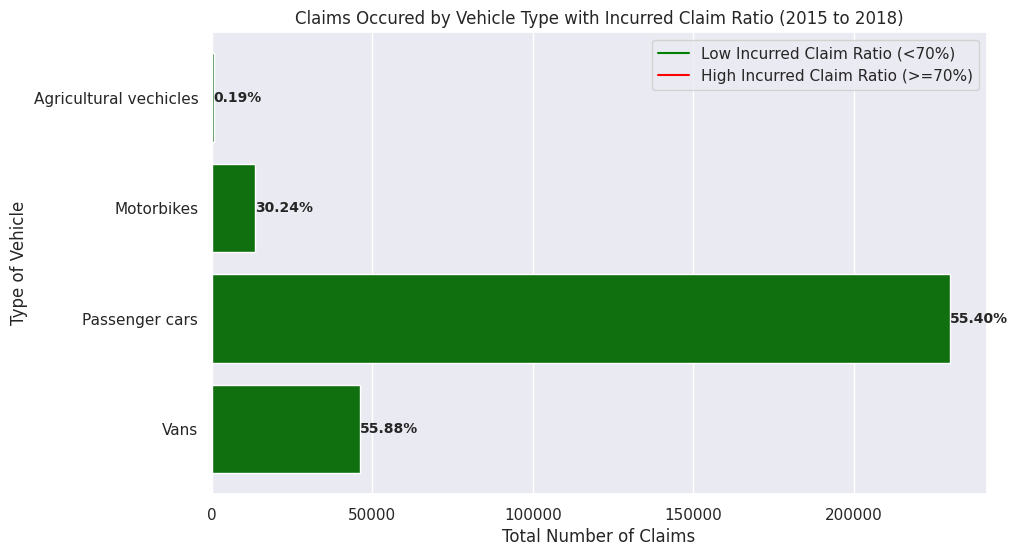

In [ ]:
# Ploting a Diverging bar chart.

sb.set(style='darkgrid') # this give the chart a dark background

# Classifying claim ratio as High or Low
risk_data['Claim_Category'] = ['Low' if x < 70 else 'High' for x in risk_data['Incurred_claim_ratio(%)']]

# Defining colors for Low and High Claim Ratio
colors = ['green' if x == 'Low' else 'red' for x in risk_data['Claim_Category']]
legend_labels = {'Low Incurred Claim Ratio (<70%)': 'green', 'High Incurred Claim Ratio (>=70%)': 'red'}

# Plotting the Diverging Bar Chart
plt.figure(figsize=(10, 6))
barplot = sb.barplot(y="Type_of_Vehicle", x="Total_No_claims_history", hue= 'Incurred_claim_ratio(%)', data=risk_data, palette=colors, orient='h', legend = False )

# Adding data labels with Claim Ratio percentage
for index, value in enumerate(risk_data['Total_No_claims_history']):
    plt.text(value, index, f"{risk_data['Incurred_claim_ratio(%)'][index]:.2f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Adding a legend manually
for label, color in legend_labels.items():
    plt.plot([], [], color=color, label=label)

plt.xlabel("Total Number of Claims")
plt.ylabel("Type of Vehicle")
plt.title("Claims Occured by Vehicle Type with Incurred Claim Ratio (2015 to 2018)")
plt.legend()
plt.show()

#source: https://chatgpt.com/c/67e98fdc-b96c-8002-9fff-77f7a6770423

**INSIGHTS**

This visualisation shows the claim ratio of each type of vehicle and the total number of claims in the time period under review.
The barchart reveals that the average incurred claim ratio of each vehicle type is below the benchmark which is good for business.
However the Vans vehicle type has the highest ratio with 46,345 claims in the last four years. Passenger cars has the highest number of claims with 229,778 claims between 2015 to 2018 while motorbikes has less than 13,631 and agricultural vehicles with 708 claims filled.

No surprises to the numbers of passenger cars due to the fact that a large percentage of this vehcile type travel alot but attention should be paid to the number of claims occuring with passenger vehicles which could be as a result of traffics, area, type of fuel in the vehicle, fraudulent claims and accidents. This visualisation enables the company to plan for the coming year and adjust pricing of the vehicle type of their customer.

**3. Evaluating the claims trends overtime using the Last contract renewal and Total_No_claims_history.**

This will help to identify the trend of how claims as occurred over the years. Trends are important moments to be identified in a company's stability; by paying attention to trends, they can stay affloat and ahead of situations and possible scenarios.  We employ a **linechart** to show this trends as this chart enables us to observe fluntations over time by easily spoting any decrease or increase in trends over time.

This will help the insurance company to see how claim has been occurring over the years and this will enable them to closely monitor and  understand the seasonal pattern, assess the influence of external factor, and make informed decisions regarding risk management and pricing.


In [ ]:
# Filtering the neccessary column for the chart
No_claims_by_year = motor_ins_claims[['Last_renewal', 'Total_No_claims_history']].copy()

# converting the Start_contract to datetime in order to be able to extract the year
No_claims_by_year['Last_renewal'] = pd.to_datetime(No_claims_by_year['Last_renewal'], format='%d/%m/%Y', errors='coerce')

#Extracting the year from the Last_Renewal
No_claims_by_year['Year'] = No_claims_by_year['Last_renewal'].dt.year

# summing up the number of claims by year
claims_over_time = No_claims_by_year.groupby('Year')['Total_No_claims_history'].sum().reset_index()

claims_over_time.head()

,Year,Total_No_claims_history
0,2015,3231
1,2016,24334
2,2017,55038
3,2018,207859


**NOTE:** 2015 has a lower claim history compared to the rest majorly because the datasets recorded only two months, Nov and Dec.

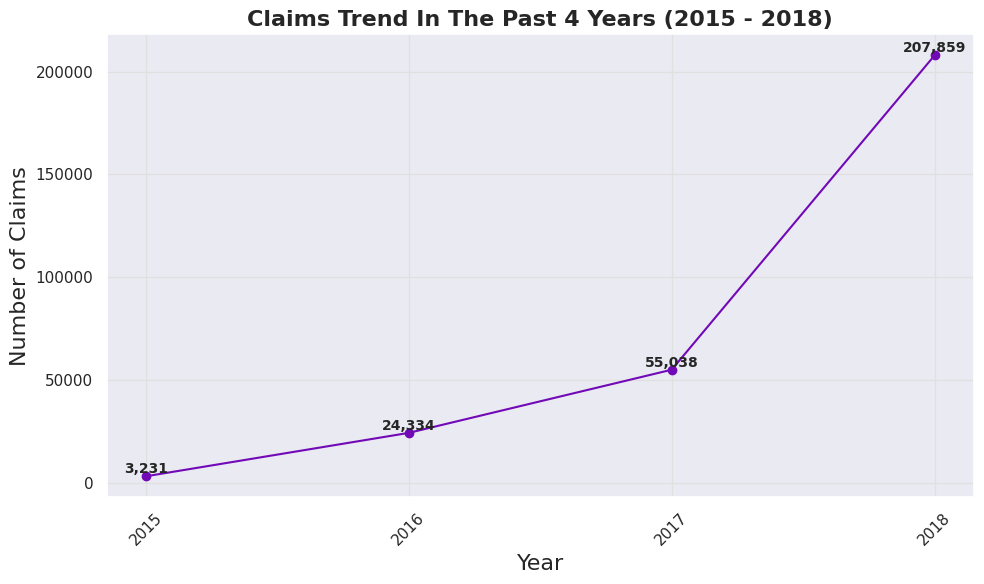

In [ ]:
# Ploting of the lineplot

# setting the size of the plot
plt.figure(figsize=(10, 6))

# Ploting the line chart
plt.plot(claims_over_time['Year'], claims_over_time['Total_No_claims_history'], marker='o', color='#7209B7')


# Adding titles and labels
plt.title('Claims Trend In The Past 4 Years (2015 - 2018)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Claims', fontsize=16)
plt.grid(color='#E0E0E0')
plt.xticks(claims_over_time['Year'], rotation=45)

# Adding data labels with Total Number of Claims
for index, value in enumerate(claims_over_time['Total_No_claims_history']):
    plt.text(claims_over_time['Year'][index], value, f"{value:,}", va='bottom', ha='center', fontsize=10, fontweight='bold')

# Showing the plot
plt.tight_layout() # this adjust the subplot parameters to aviod overlaping
plt.show()

**INSIGHTS**

This visualisation reveals the trends of claim over the last 4 years. Insurance claims has been on the rise since 2015, claims has however skyrocketed in 2018 compared to previous years. This is quite concerning for the business as urgent investigation is needed to identify the multiple (3.77X) increase in claims from 2017 to 2018.

There are certain factors that could have resulted in claim increase over this periods. Attention needs to be paid to certain factors like:

Number of accidents due to traffic, reckless driving and bad roads.

Poor vehicle maintainance by policyholders and age of the vehicle.

Inflation and repair cost of the vehicles.

Increase in fraudlulents claims can result in this kind of trends.

Changes in legal regulations and other economic factors.

Age of drivers, reckless driving is mostly found in younger drivers.

Recognising the trends can enable the company to pinpoint what exactly happened during those periods and prepare better for subsequent surges.

**4. Exploring relationships between insurance premium and claims history by area**

In [ ]:
# Installing plotly

!pip install plotly

In [ ]:
# importing the library.

import plotly.express as px

In [ ]:
# using plotly to plot Premium vs. Total_No_claims_history, colored by Area

fig = px.scatter(motor_ins_claims, x='Total_premium', y='Total_No_claims_history', color='Area', symbol='Area',
                 title='Relationship Between Insurance Premium and Total No. of Claims by Area',
                 labels={'Total_premium': 'Total Premium', 'Total_No_claims_history': 'Total No. of Claims'},
                 opacity=0.7)

fig.update_layout(title_x=0.5, title_y=0.88) # to put the title at the centre and to reduce the gap between the chart and the title.

fig.show()

#reference:
# https://www.youtube.com/watch?v=LhiHCzXVTJM
# https://www.youtube.com/watch?v=Lqkbyjq0KYc
# https://plotly.github.io/plotly.py-docs/generated/plotly.html

**INSIGHTS**

This scatter plot shows the relationship between premium paid, total number of claims and area type (Rural vs Urban).

Majority of policyholders pay lower premiums with a huge concentration below 2000 and number of claims of most policyholders falls under 50 claims in the last 4 years.
Furthermore, both the urban (red dots) and rural (blue dots) area has similar trends with both densely packed in the lower premium range (0- 2000). However, the rural area is more widely spread in claim numbers and has more outliers with extremely high claims above 100 compared to urban area. The urban shows outliers too but with less extreme claim count compared to the rural area.  As premium increases, there is less claims with the exception of a few outliers with expensive premium which could mean they are luxirious cars or agricultural vehicles with 24 - 27 claims.

With the rural areas showing more claims outlier and widely dispersed distribution, the insurance company needs to pay attention to factors contributing to this outcomes which could be due to bad roads, long mileage on vehicles, theft, accidents and others. The company has to analyse why rural policyholders are exhibiting higher claims and plan to adjust pricing or additional risk management measures in place if it persist.

Also, there is need to adjust the pricing models of the company as higher premium paid does not correlate with high claims and different strategies might need to be adopted for urban and rural customers respectively.


With this visualisation, it is very possible for the company to flag individuals exhibiting higher claims by searching through their private database.

# **4.0 CONCLUSION**

The analysis of the auto insurance dataset has uncovered key patterns and trends that provide valuable insights for optimizing claims management and financial stability in Insurance. By understanding risk factors, areas and claim patterns, the insurance company can make informed decisions to manage their books and stay ahead of trends and situations. Given that insurance inherently involves risk pooling, it is crucial for the company to adopt proactive strategies to mitigate risks, adjust pricing and improve financial solvency. Implementing these insights will enable the company to plan better for the future and ensure long-term financial stability in the coming fiscal years.